In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('placement.csv')

In [28]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [21]:
df.describe()

,cgpa,iq,placement
count,100.000000,100.000000,100.000000
mean,5.991000,123.580000,0.500000
std,1.143634,39.944198,0.502519
min,3.300000,37.000000,0.000000
25%,5.075000,101.500000,0.000000
50%,6.000000,127.500000,0.500000
75%,6.900000,149.000000,1.000000
max,8.500000,233.000000,1.000000


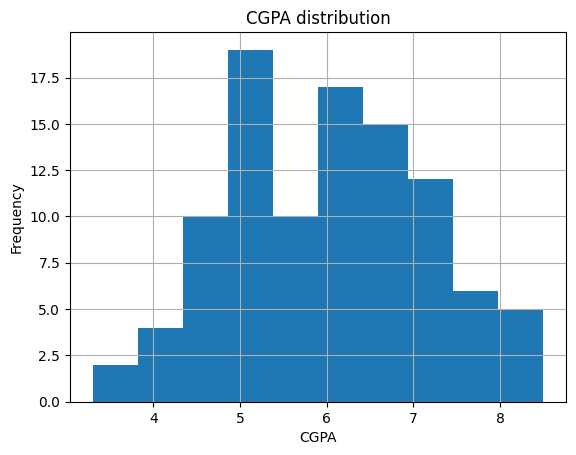

In [23]:
df['cgpa'].hist()
plt.title('CGPA distribution')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.show()

In [24]:
correlation=df['cgpa'].corr(df['iq'])
print("Correlation btw ig and cgpa->",correlation)

Correlation btw ig and cgpa-> -0.0987906720582117


In [26]:
correlation2=df['placement'].corr(df['iq'])
correlation2

np.float64(-0.08303145184944896)

In [27]:
correlation3=df['placement'].corr(df['cgpa'])
correlation3

np.float64(0.8216882545643998)

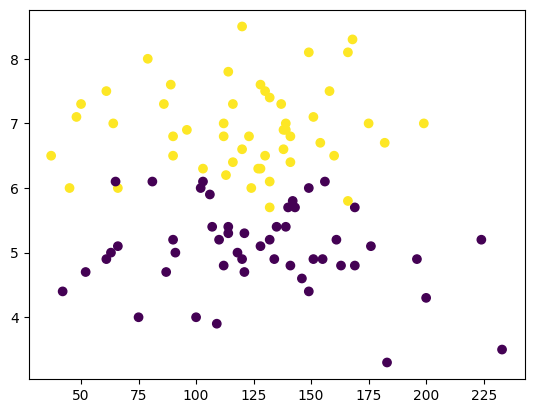

In [32]:
plt.scatter(df['iq'],df['cgpa'],c=df['placement'])
#help(plt.scatter)

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns

In [34]:
X=df[['iq','cgpa']]
y=df['placement']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=LogisticRegression()
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [ ]:
#Model without scaling 
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
conf_mat=confusion_matrix(y_test,y_pred)
print("Accuracy:",accuracy)
print("Confusion Matrix:",conf_mat)

Accuracy: 0.85
Confusion Matrix: [[9 1]
 [2 8]]


In [47]:
#after scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)
model_scaled_lr=LogisticRegression()
model_scaled_lr.fit(X_train_scaled,y_train)
y_pred=model_scaled_lr.predict(X_test_scaled)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.85


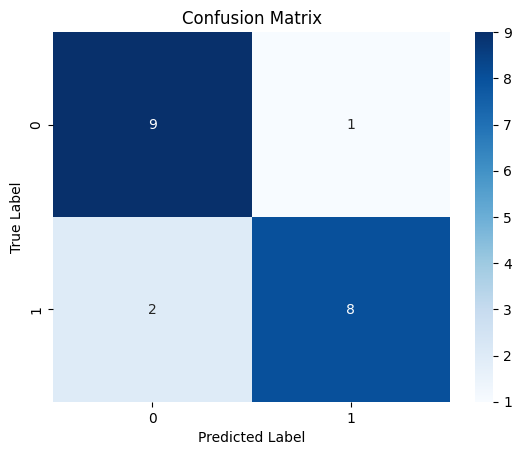

In [41]:
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [44]:
from sklearn.svm import SVC
model_svc=SVC(kernel='linear')

model_svc.fit(X_train,y_train)
y_pred=model_svc.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
conf_mat=confusion_matrix(y_test,y_pred)
print("Accuracy:",accuracy)
print("Confusion Matrix:",conf_mat)

Accuracy: 0.95
Confusion Matrix: [[ 9  1]
 [ 0 10]]


In [48]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)
model_scaled_svc=SVC(kernel='linear')
model_scaled_svc.fit(X_train_scaled,y_train)
y_pred=model_scaled_svc.predict(X_test_scaled)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.95


In [50]:
import pickle

with open("model_svc.pkl", "wb") as f:
    pickle.dump(model_svc, f)
